# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


In [3]:
cities

['kruisfontein',
 'port-aux-francais',
 'soure',
 'ilulissat',
 'rongelap',
 'keflavik',
 'edinburgh of the seven seas',
 'jamestown',
 'petropavlovsk-kamchatsky',
 'saint-louis',
 'puerto natales',
 'enewetak',
 'nalut',
 'blackmans bay',
 'college',
 'yellowknife',
 'troitsko-pechorsk',
 'tiksi',
 'nema',
 'thunder bay',
 'bilibino',
 'el rama',
 'adamstown',
 'uturoa',
 'taiohae',
 'aleksandrovsk-sakhalinskiy',
 'waitangi',
 'ribeira grande',
 'grytviken',
 'jiuquan',
 'ghat',
 'itapui',
 'ushuaia',
 'hamilton',
 'fisterra',
 'mata-utu',
 'san luis de la loma',
 'saipan',
 'ujae',
 'mahina',
 'galliano',
 'tura',
 "muzayri'",
 'glace bay',
 'ankang',
 'port lincoln',
 'igarka',
 'howard springs',
 'abomsa',
 'piacabucu',
 'rawson',
 'papatowai',
 'puerto ayora',
 'hawaiian paradise park',
 'mount isa',
 'jianshui',
 'daru',
 'masuguru',
 'albany',
 'ponta delgada',
 'olonkinbyen',
 'sinop',
 'nova sintra',
 'prince george',
 'bethel',
 'klaksvik',
 'punta arenas',
 'tobi village',
 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather_response = requests.get(city_url)
        city_weather = city_weather_response.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp - 273.15,   #Convert from Kelvin to Celsius
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kruisfontein
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | soure
Processing Record 4 of Set 1 | ilulissat
Processing Record 5 of Set 1 | rongelap
Processing Record 6 of Set 1 | keflavik
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | saint-louis
Processing Record 11 of Set 1 | puerto natales
Processing Record 12 of Set 1 | enewetak
Processing Record 13 of Set 1 | nalut
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | troitsko-pechorsk
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | nema
Processing Record 20 of Set 1 | thunder bay
Processing Record 21 of Set 1 | bilibino
Processing Record 22 of

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kruisfontein,-34.0033,24.7314,20.53,39,51,11.34,ZA,1724768861
1,port-aux-francais,-49.3500,70.2167,2.99,75,6,8.11,TF,1724768862
2,soure,-0.7167,-48.5233,31.03,61,38,3.76,BR,1724768736
3,ilulissat,69.2167,-51.1000,4.01,100,75,1.54,GL,1724768719
4,rongelap,11.1635,166.8941,28.39,82,100,9.24,MH,1724768865


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,20.53,39,51,11.34,ZA,1724768861
1,port-aux-francais,-49.3500,70.2167,2.99,75,6,8.11,TF,1724768862
2,soure,-0.7167,-48.5233,31.03,61,38,3.76,BR,1724768736
3,ilulissat,69.2167,-51.1000,4.01,100,75,1.54,GL,1724768719
4,rongelap,11.1635,166.8941,28.39,82,100,9.24,MH,1724768865


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

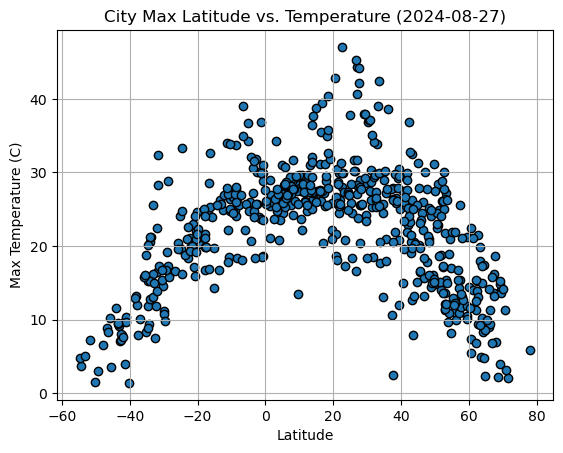

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

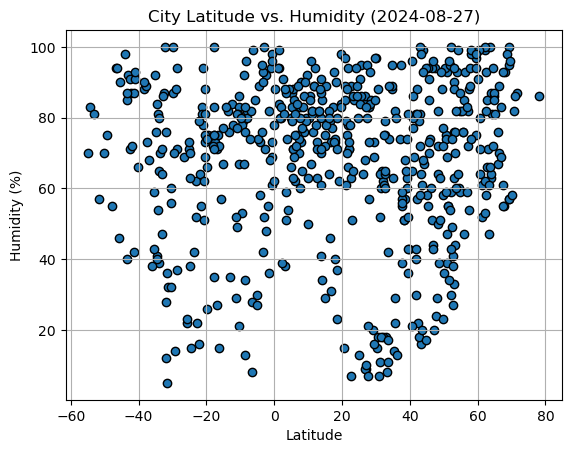

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

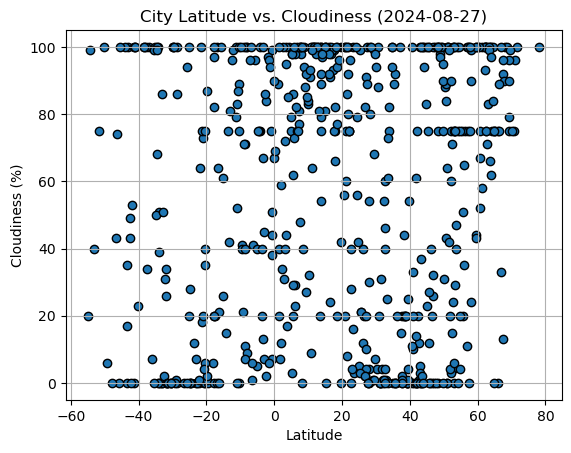

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor = "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

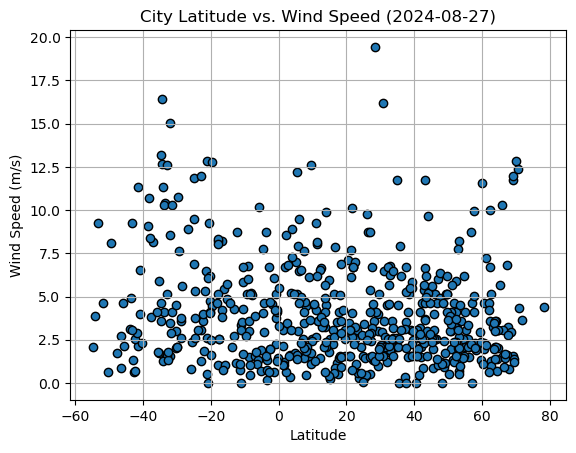

In [31]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", edgecolor = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,ilulissat,69.2167,-51.1000,4.01,100,75,1.54,GL,1724768719
4,rongelap,11.1635,166.8941,28.39,82,100,9.24,MH,1724768865
5,keflavik,64.0049,-22.5624,10.24,87,100,3.60,IS,1724768866
7,jamestown,42.0970,-79.2353,22.80,88,75,2.06,US,1724768837
8,petropavlovsk-kamchatsky,53.0452,158.6483,11.33,76,75,2.00,RU,1724768870


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kruisfontein,-34.0033,24.7314,20.53,39,51,11.34,ZA,1724768861
1,port-aux-francais,-49.3500,70.2167,2.99,75,6,8.11,TF,1724768862
2,soure,-0.7167,-48.5233,31.03,61,38,3.76,BR,1724768736
6,edinburgh of the seven seas,-37.0676,-12.3116,10.12,68,100,8.13,SH,1724768867
10,puerto natales,-51.7236,-72.4875,7.25,57,75,4.63,CL,1724768872


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.41163100957899895


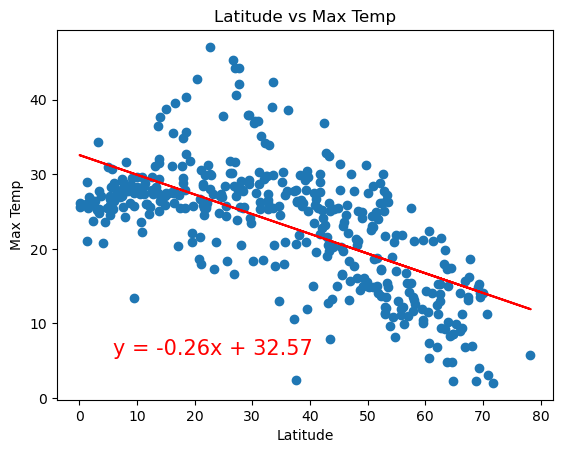

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,5.8),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r^2-value is: {rvalue**2}")
plt.show()



The r^2-value is: 0.6597603405119565


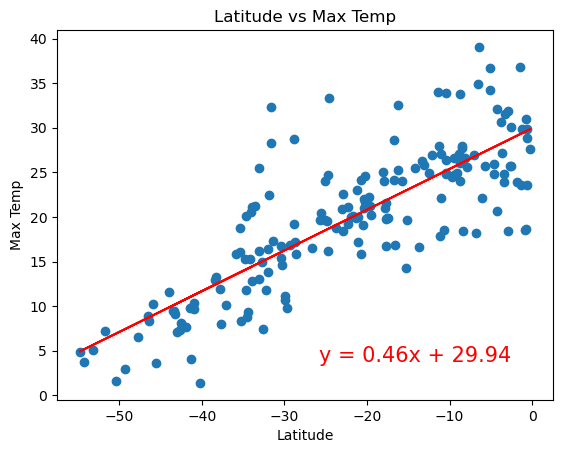

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25.8,3.8),fontsize=15,color="red")
plt.title("Latitude vs Max Temp")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
<!-- There is a moderate positive correlation between Latitude and Max Temp for both the Northern and Southern
hemispheres.  As the latitude increases, the temperature increases.
The northern hemisphere has an r^2 value of 0.412 and the southern hemisphere has
an r^2 value of 0.660.  For both the Northern and Southern hemispheres the temperature increases 
as you approach the equator.  The Southern hemisphere plot shows a larger correlation between 
latitude and Max Temp.    -->

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0005252798115091242


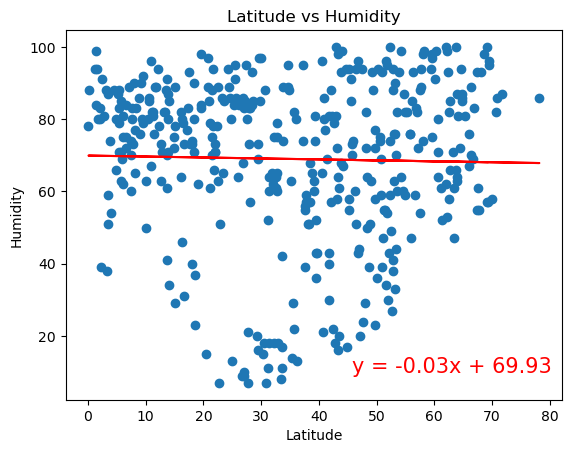

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45.8,9.8),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.0005542056191526079


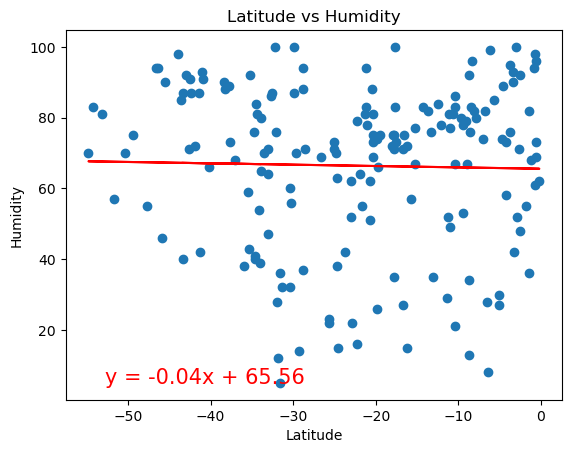

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52.8,4.8),fontsize=15,color="red")
plt.title("Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
<!-- There is almost no correlation between Latitude and Humidity for either the Northern or Southern
hemispheres.  The r^2 value for the Northern Hemisphere plot is 0.000525 and the r^2 value for the Southern
Hemisphere is 0.000554 which implies no effective correlation. -->

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.00038558102111982265


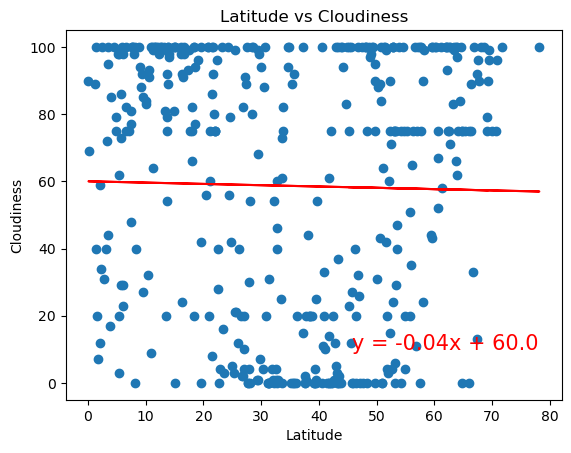

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45.8,9.8),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.006005895056907024


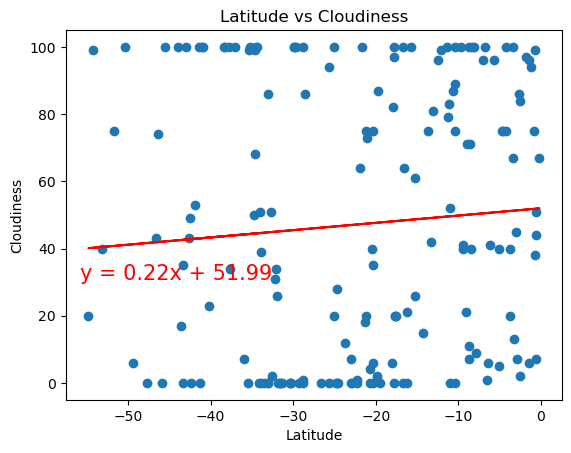

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55.8,30.8),fontsize=15,color="red")
plt.title("Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
<!-- There is almost no correlation between Latitude and Cloudiness for either the Northern or Southern
hemispheres.  The r^2 value for the Northern Hemisphere plot is 0.000385 and the r^2 value for the Southern
Hemisphere is 0.006005 which implies no effective correlation. -->

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0013282727721313809


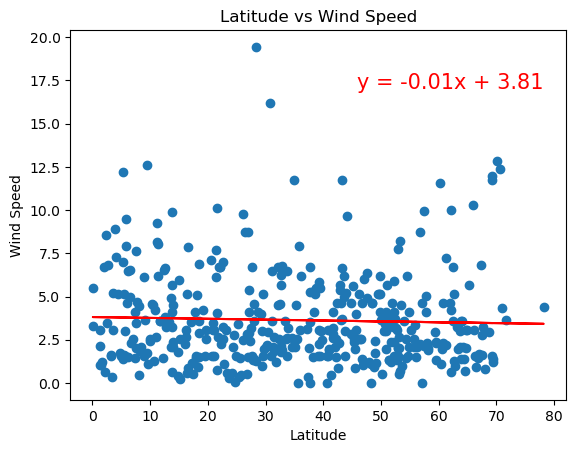

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45.8,17.0),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

The r^2-value is: 0.034412157759909835


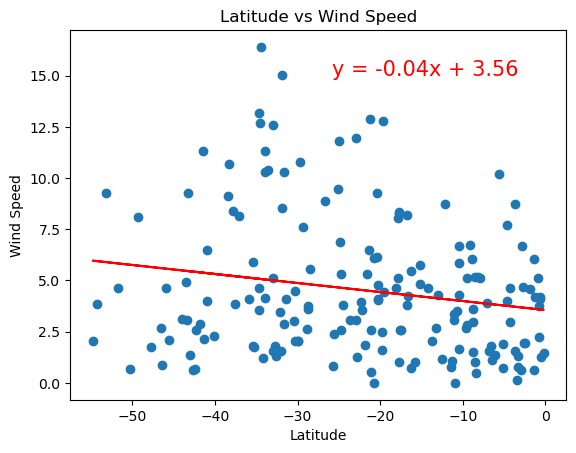

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25.8,15.0),fontsize=15,color="red")
plt.title("Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r^2-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** 
<!-- There is very little correlation between Latitude and Wind Speed for either the Northern or Southern
hemispheres.  The r^2 value for the Northern Hemisphere plot is 0.001328 and the r^2 value for the Southern
Hemisphere is 0.03441 which implies very little correlation. -->